In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [8]:
df=pd.read_csv(r'D:/DS-Input-Files/Classified_Data.csv',index_col=0)
df.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0


In [9]:
y=df.pop('TARGET CLASS')

In [10]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [11]:
scaler=StandardScaler()

In [12]:
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.4)

In [14]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [17]:
knn=KNeighborsClassifier(n_neighbors=1)

In [18]:
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
predict=knn.predict(x_test_scaled)

In [24]:
print("accuracy is \n",accuracy_score(y_test,predict)*100)

accuracy is 
 92.75


In [23]:
print("classification report is \n",classification_report(y_test,predict))

classification report is 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       191
           1       0.95      0.90      0.93       209

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [25]:
print("confusion matrix is \n",confusion_matrix(y_test,predict))

confusion matrix is 
 [[182   9]
 [ 20 189]]


In [36]:
from sklearn.model_selection import GridSearchCV

In [38]:
gs=GridSearchCV(knn,params,verbose=1)

In [37]:
params={
    'n_neighbors' : ['30','20','12','1']
}

In [39]:
gs.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Nandini\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Nandini\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Nandini\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Nandini\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 439, in _fit
    self.n_neighbors < self._fit_X.shape[0] // 2) and
TypeError: '<' not supported between instances of 'str' and 'int'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Nandini\anaconda3\lib\site-packages\sklearn\model_selection\_validatio

TypeError: '<' not supported between instances of 'str' and 'int'

In [43]:
error_rate = []
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    predictions=knn.predict(x_test)
    error_rate.append(np.mean(y_test!=predictions))

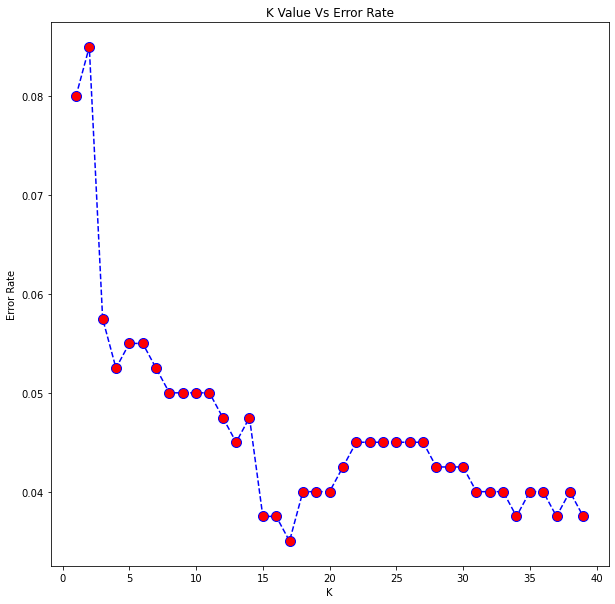

In [52]:
plt.figure(figsize=(10,10))
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('K Value Vs Error Rate')
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

##Error is minimum when K value is between 15 to 20
Thereby trying the n_neighbors value between 15 to 20

In [60]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train,y_train)
prediction_knn=knn.predict(x_test)
print("Accuracy after changing n_neighbor value is\n",accuracy_score(y_test,prediction_knn)*100)
#print("Classification report after changing n_neighbor value is\n ",classification_report(y_test,prediction_knn)*100)\
print("Confusion Matrix after changing n_neighbor value is\n ",confusion_matrix(y_test,prediction_knn))

Accuracy after changing n_neighbor value is
 96.5
Confusion Matrix after changing n_neighbor value is
  [[185   6]
 [  8 201]]


##The accuracy have changed vastly after altering the value of n_neighbor from 1 to 17